In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Preprocessing
- Each 30sec audio file is split into 5 segments and then the MFCCs are extracted from these 5 segments, it is very similar to the TF-patches but we do it in the time domain and there is no overlap.

- Intend to feed the deep learning models one segment per input.

One 30 second audio file (22050x30 samples) --> 5 segments (22050x30/5 samples per segment) --> Using frame size 1024,hop length 512 and n_mfccs = 13 (13x130 feature matrix per segment)

In [3]:
import json
import tensorflow.keras as keras
import numpy as np
import pandas as pd

file_path = '/content/drive/MyDrive/Music Genre Classifier Dataset/data_10.json'
with open(file_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
X = np.array(data["mfcc"])
y = np.array(data["labels"])

In [7]:
# (num_audio_files * 5, num_frames, n_mfccs)
print(X.shape)
print(y.shape)

(9986, 130, 13)
(9986,)


In [4]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Models
- Basic Multilayer Perceptron
- Convolutional Neural Network
- Recurrent Neural Network
- Long Short Term Memory

## 2.1. Multilayer Perceptron

In [17]:
# Basic Multilayer perceptron 512-> 256 -> 64 -> 10

MLP = keras.Sequential()

MLP.add(keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
MLP.add(keras.layers.Dense(512, activation="relu"))
MLP.add(keras.layers.Dense(256, activation="relu"))
MLP.add(keras.layers.Dense(64, activation="relu" ))
MLP.add(keras.layers.Dense(10, activation="softmax"))

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
MLP.compile(optimizer="adam", loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

history =MLP.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
MLP.summary()

Epoch 1/50
250/250 [==============================] - 4s 14ms/step - loss: 5.7524 - accuracy: 0.1978 - val_loss: 2.1038 - val_accuracy: 0.1627
Epoch 2/50
250/250 [==============================] - 3s 13ms/step - loss: 2.0470 - accuracy: 0.2197 - val_loss: 2.0196 - val_accuracy: 0.2292
Epoch 3/50
250/250 [==============================] - 5s 18ms/step - loss: 1.9455 - accuracy: 0.2720 - val_loss: 1.9518 - val_accuracy: 0.2738
Epoch 4/50
250/250 [==============================] - 4s 15ms/step - loss: 1.9211 - accuracy: 0.2823 - val_loss: 1.9723 - val_accuracy: 0.2457
Epoch 5/50
250/250 [==============================] - 3s 13ms/step - loss: 1.8828 - accuracy: 0.2887 - val_loss: 1.9879 - val_accuracy: 0.3068
Epoch 6/50
250/250 [==============================] - 3s 12ms/step - loss: 1.8295 - accuracy: 0.3110 - val_loss: 1.8659 - val_accuracy: 0.2858
Epoch 7/50
250/250 [==============================] - 4s 18ms/step - loss: 1.7867 - accuracy: 0.3346 - val_loss: 1.9749 - val_accuracy: 0.3183

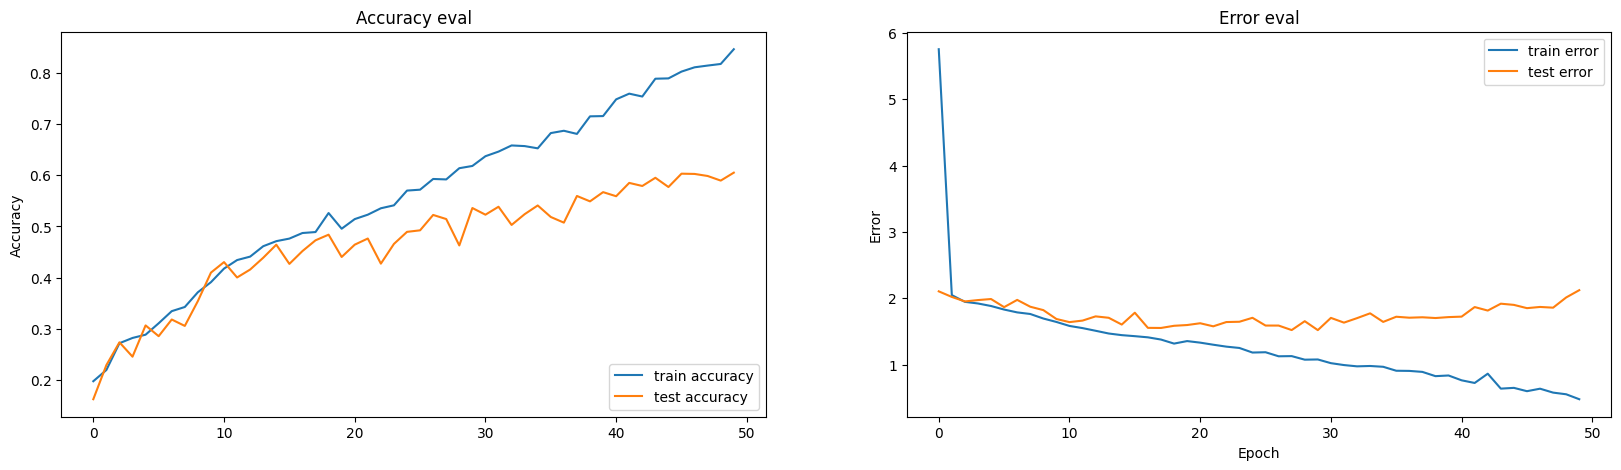

In [18]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (20,5))

# create accuracy sublpot
ax1.plot(history.history["accuracy"], label="train accuracy")
ax1.plot(history.history["val_accuracy"], label="test accuracy")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="lower right")
ax1.set_title("Accuracy eval")

# create error sublpot
ax2.plot(history.history["loss"], label="train error")
ax2.plot(history.history["val_loss"], label="test error")
ax2.set_ylabel("Error")
ax2.set_xlabel("Epoch")
ax2.legend(loc="upper right")
ax2.set_title("Error eval")

plt.show()

In [21]:
# Basic Multilayer with regularisation

MLP_reg = keras.Sequential()

MLP_reg.add(keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
MLP_reg.add(keras.layers.Dense(512, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
MLP_reg.add(keras.layers.Dropout(0.2))
MLP_reg.add(keras.layers.Dense(256, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
MLP_reg.add(keras.layers.Dropout(0.2))
MLP_reg.add(keras.layers.Dense(64, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
MLP_reg.add(keras.layers.Dropout(0.2))
MLP_reg.add(keras.layers.Dense(10, activation="softmax"))

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
MLP_reg.compile(optimizer="adam", loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

history_reg = MLP_reg.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
MLP_reg.summary()

Epoch 1/50
250/250 [==============================] - 6s 18ms/step - loss: 6.7222 - accuracy: 0.1201 - val_loss: 3.3784 - val_accuracy: 0.1301
Epoch 2/50
250/250 [==============================] - 4s 14ms/step - loss: 3.4114 - accuracy: 0.1226 - val_loss: 3.2599 - val_accuracy: 0.1562
Epoch 3/50
250/250 [==============================] - 4s 14ms/step - loss: 3.2720 - accuracy: 0.1410 - val_loss: 3.2004 - val_accuracy: 0.1361
Epoch 4/50
250/250 [==============================] - 5s 21ms/step - loss: 3.2187 - accuracy: 0.1442 - val_loss: 3.1027 - val_accuracy: 0.1436
Epoch 5/50
250/250 [==============================] - 4s 14ms/step - loss: 3.1428 - accuracy: 0.1324 - val_loss: 3.0344 - val_accuracy: 0.1456
Epoch 6/50
250/250 [==============================] - 4s 15ms/step - loss: 3.0451 - accuracy: 0.1355 - val_loss: 2.9968 - val_accuracy: 0.1241
Epoch 7/50
250/250 [==============================] - 4s 16ms/step - loss: 2.9706 - accuracy: 0.1268 - val_loss: 2.8631 - val_accuracy: 0.1612

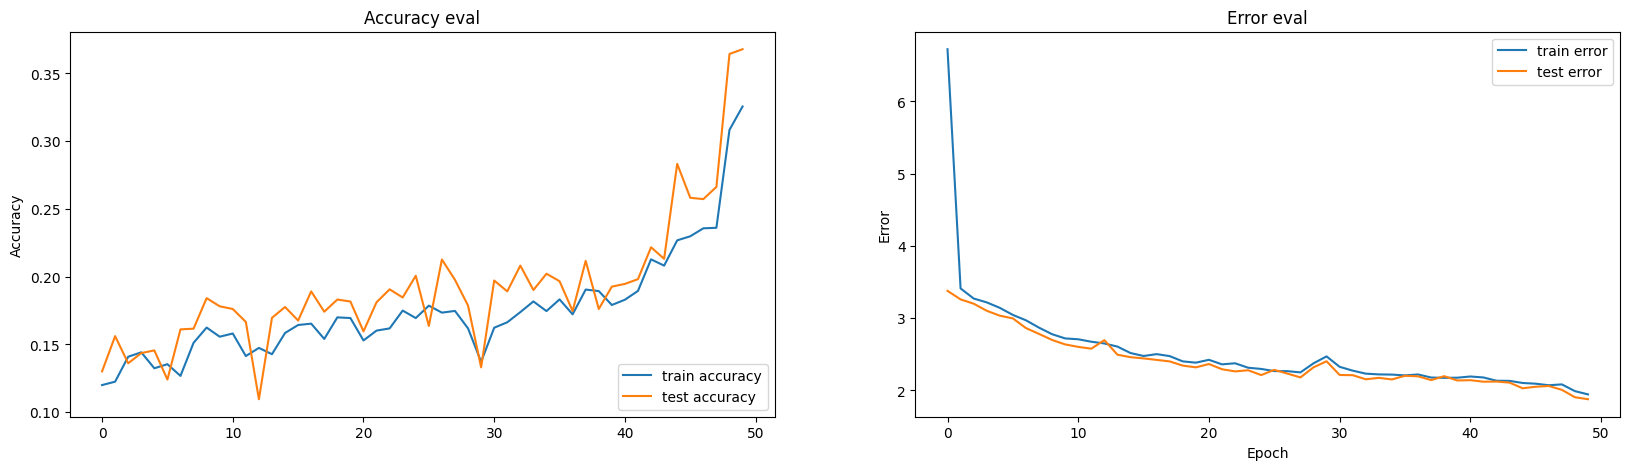

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (20,5))

# create accuracy sublpot
ax1.plot(history_reg.history["accuracy"], label="train accuracy")
ax1.plot(history_reg.history["val_accuracy"], label="test accuracy")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="lower right")
ax1.set_title("Accuracy eval")

# create error sublpot
ax2.plot(history_reg.history["loss"], label="train error")
ax2.plot(history_reg.history["val_loss"], label="test error")
ax2.set_ylabel("Error")
ax2.set_xlabel("Epoch")
ax2.legend(loc="upper right")
ax2.set_title("Error eval")

plt.show()

## 2.2. Convolutional Network

In [25]:
# Base 3 layer Convolutional
CNN = keras.Sequential()
CNN.add(keras.layers.Conv2D(32, (3,3), activation="relu",input_shape=(X_train.shape[1],X_train.shape[2],1)))
CNN.add(keras.layers.MaxPooling2D((3,3), strides=(2,2),padding="same"))
CNN.add(keras.layers.Conv2D(64,(3,3),activation ="relu"))
CNN.add(keras.layers.MaxPooling2D((3,3), strides=(2,2),padding="same"))
CNN.add(keras.layers.Conv2D(128,(2,2),activation ="relu"))
CNN.add(keras.layers.Flatten())
CNN.add(keras.layers.Dense(64,activation="relu"))
CNN.add(keras.layers.Dropout(0.1))
CNN.add(keras.layers.Dense(10,activation="softmax"))

CNN.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_CNN = CNN.fit(X_train, y_train, epochs = 20, batch_size=32, validation_data=(X_test,y_test))
CNN.summary()

Epoch 1/20
250/250 [==============================] - 19s 71ms/step - loss: 1.9155 - accuracy: 0.3356 - val_loss: 1.4913 - val_accuracy: 0.4479
Epoch 2/20
250/250 [==============================] - 19s 77ms/step - loss: 1.4883 - accuracy: 0.4425 - val_loss: 1.3978 - val_accuracy: 0.4655
Epoch 3/20
250/250 [==============================] - 19s 78ms/step - loss: 1.3201 - accuracy: 0.5035 - val_loss: 1.1970 - val_accuracy: 0.5656
Epoch 4/20
250/250 [==============================] - 18s 70ms/step - loss: 1.2325 - accuracy: 0.5459 - val_loss: 1.1563 - val_accuracy: 0.5876
Epoch 5/20
250/250 [==============================] - 17s 68ms/step - loss: 1.1153 - accuracy: 0.5890 - val_loss: 1.0764 - val_accuracy: 0.5996
Epoch 6/20
250/250 [==============================] - 17s 68ms/step - loss: 1.0258 - accuracy: 0.6203 - val_loss: 1.1686 - val_accuracy: 0.5751
Epoch 7/20
250/250 [==============================] - 18s 70ms/step - loss: 0.9657 - accuracy: 0.6461 - val_loss: 1.0824 - val_accuracy:

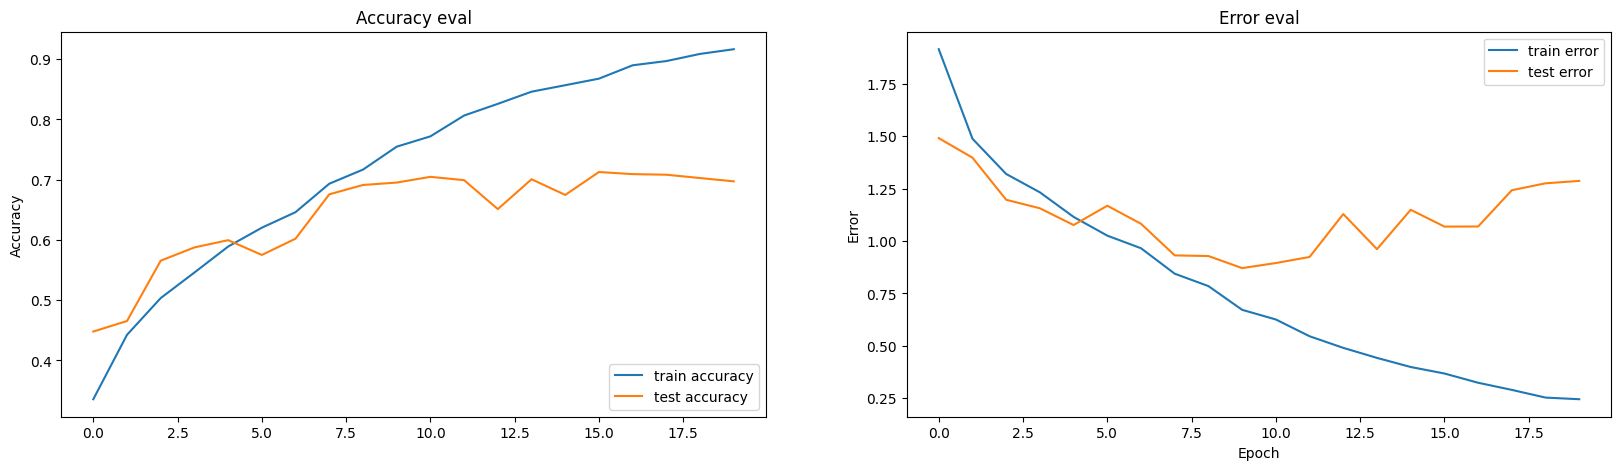

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (20,5))

# create accuracy sublpot
ax1.plot(history_CNN.history["accuracy"], label="train accuracy")
ax1.plot(history_CNN.history["val_accuracy"], label="test accuracy")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="lower right")
ax1.set_title("Accuracy eval")

# create error sublpot
ax2.plot(history_CNN.history["loss"], label="train error")
ax2.plot(history_CNN.history["val_loss"], label="test error")
ax2.set_ylabel("Error")
ax2.set_xlabel("Epoch")
ax2.legend(loc="upper right")
ax2.set_title("Error eval")

plt.show()

## 2.3. Recurrent Neural Networks

In [8]:
LSTM = keras.Sequential()
LSTM.add(keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
LSTM.add(keras.layers.LSTM(64))
LSTM.add(keras.layers.Dense(64, activation='relu'))
LSTM.add(keras.layers.Dropout(0.3))
LSTM.add(keras.layers.Dense(10, activation='softmax'))

LSTM.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history_LSTM = LSTM.fit(X_train, y_train, epochs = 20, batch_size=32, validation_data=(X_test,y_test))
LSTM.summary()

Epoch 1/20
250/250 [==============================] - 46s 166ms/step - loss: 1.7213 - accuracy: 0.3868 - val_loss: 1.3950 - val_accuracy: 0.5160
Epoch 2/20
250/250 [==============================] - 39s 157ms/step - loss: 1.4083 - accuracy: 0.5024 - val_loss: 1.2421 - val_accuracy: 0.5475
Epoch 3/20
250/250 [==============================] - 44s 177ms/step - loss: 1.2962 - accuracy: 0.5476 - val_loss: 1.1763 - val_accuracy: 0.5771
Epoch 4/20
250/250 [==============================] - 42s 169ms/step - loss: 1.1746 - accuracy: 0.5926 - val_loss: 1.1303 - val_accuracy: 0.5996
Epoch 5/20
250/250 [==============================] - 41s 164ms/step - loss: 1.0816 - accuracy: 0.6338 - val_loss: 1.0212 - val_accuracy: 0.6336
Epoch 6/20
250/250 [==============================] - 42s 168ms/step - loss: 1.0097 - accuracy: 0.6557 - val_loss: 1.0092 - val_accuracy: 0.6386
Epoch 7/20
250/250 [==============================] - 39s 155ms/step - loss: 0.9659 - accuracy: 0.6728 - val_loss: 0.9450 - val_ac

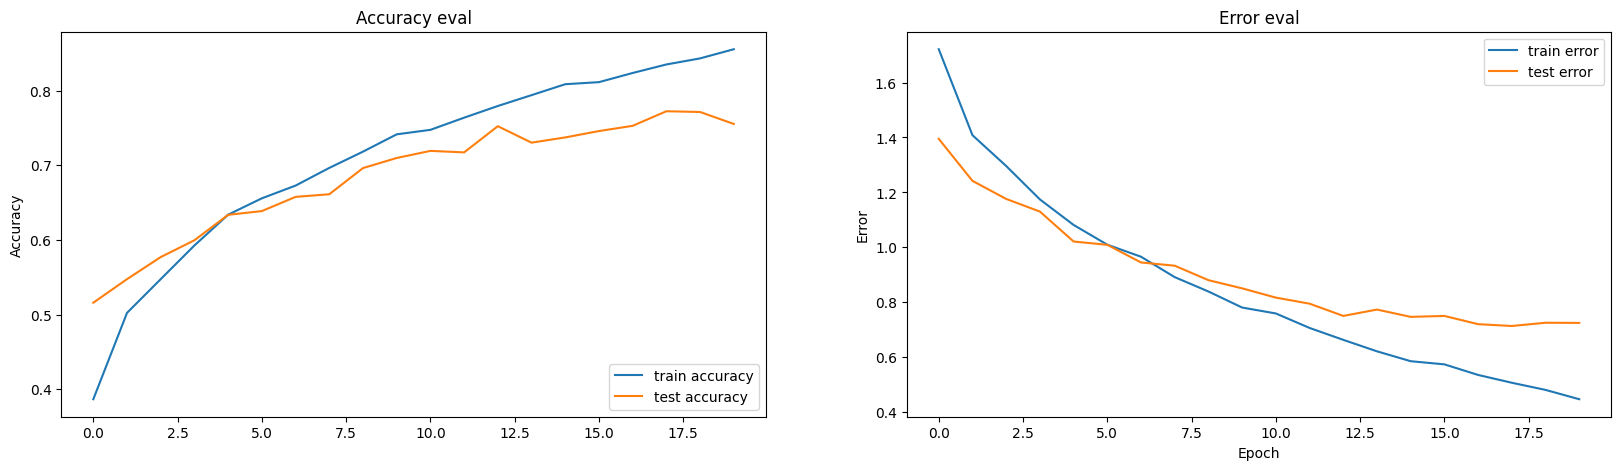

In [10]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (20,5))

# create accuracy sublpot
ax1.plot(history_LSTM.history["accuracy"], label="train accuracy")
ax1.plot(history_LSTM.history["val_accuracy"], label="test accuracy")
ax1.set_ylabel("Accuracy")
ax1.legend(loc="lower right")
ax1.set_title("Accuracy eval")

# create error sublpot
ax2.plot(history_LSTM.history["loss"], label="train error")
ax2.plot(history_LSTM.history["val_loss"], label="test error")
ax2.set_ylabel("Error")
ax2.set_xlabel("Epoch")
ax2.legend(loc="upper right")
ax2.set_title("Error eval")

plt.show()